In [2]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
from functools import partial
import scipy
import itertools
import matplotlib
import seaborn as sns

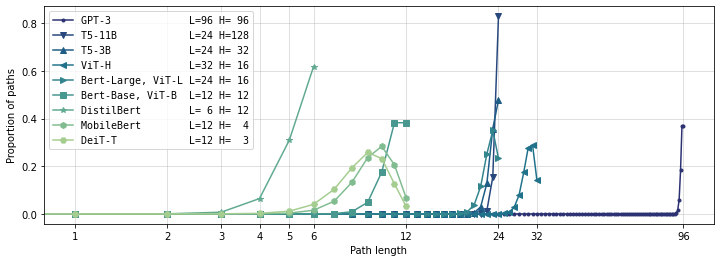

In [3]:
architectures = [
    ("DistilBert", 12, 6),
    ("MobileBert", 4, 12),
    ("Bert-Base, ViT-B", 12, 12),
    ("Bert-Large, ViT-L", 16, 24),
    ("ViT-H", 16, 32),
    ("T5-3B", 32, 24),
    ("T5-11B", 128, 24),
    ("GPT-3", 96, 96),
    ("DeiT-T", 3, 12),
]

def num_paths(k, L, H):
    return 10 ** (np.log10(scipy.special.comb(L, k)) + k * np.log10(H))

from collections import defaultdict

markers = ["o", "v", "^", "<", ">", "s",  "*", "h", "H", "+", "x", "X", "D", "d", "1", "2", "3", "4", "8", "p","P", ]
marker = defaultdict(lambda: markers[len(marker)])
marker["GPT-3"] = "."

plot_attrs = ["num_heads"]
# plot_attrs = ["layers", "num_heads", "ratio"]
fig, axes = plt.subplots(1, len(plot_attrs), figsize=(12 * len(plot_attrs), 4))

for ax, attr in zip([axes], plot_attrs):
    plt.sca(ax)

    color_attr = {
        "layers": lambda heads, layers: layers,
        "heads": lambda heads, layers: heads,
        "ratio": lambda heads, layers: layers / heads,
        "num_heads": lambda heads, layers: layers * heads,
    }[attr]

    cmap_name = {
        "layers": "crest",
        "heads": "flare",
        "ratio": "viridis",
        "num_heads": "crest"
    }[attr]

    title = {
        "layers": "Comparison by number of layers L",
        "heads": "Comparison by number of heads H",
        "ratio": "Comparison by ratio L / H",
        "num_heads": "Comparison by total number of heads"
    }[attr]

    num_colors = len(set(color_attr(h, l) for _, h, l in architectures))
    ordered_color_attr = sorted(list(set(color_attr(h, l) for _, h, l in architectures)))
    cmap = plt.cm.get_cmap(cmap_name, num_colors)
    norm = matplotlib.colors.Normalize(vmin=6, vmax=96)


    for _, (name, heads, layers) in enumerate(sorted(architectures, reverse=True, key=lambda r: (color_attr(r[1], r[2]), r[1], r[2]))):
        depths = jnp.arange(0, layers + 1)
        counts = np.array([num_paths(d, L=layers, H=heads) for d in depths])
        counts /= counts.sum()
        # depths /= depths.max()
        plt.plot(depths, counts, label=f"{name:<18}L={layers:>2} H={heads:>3}", marker=marker[name], c=cmap(ordered_color_attr.index(color_attr(heads, layers))))

    plt.set_cmap(cmap)
    plt.legend(prop={'family': 'monospace'})
    plt.grid(alpha=.5)
    plt.ylabel("Proportion of paths")
    plt.xlabel("Path length")
    plt.xscale("log")
    ticks = list(range(1, 6)) + [6, 12, 24, 32, 96]
    plt.xticks(ticks=ticks, labels=list(map(str, ticks)))
    plt.minorticks_off()


In [4]:
import pathlib
pathlib.Path("figures").mkdir(parents=True, exist_ok=True)
filename = "figures/path_length_distribution"
fig.savefig(f"{filename}.pdf")
!pdfcrop {filename}.pdf {filename}_croped.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `figures/path_length_distribution_croped.pdf'.
